# Predicting H1N1 and FLU Vaccines

### Importing Necessary Libraries

In [61]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df_features = pd.read_csv('data/training_set_features.csv')
df_labels = pd.read_csv('data/training_set_labels.csv')

In [4]:
df_features

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [5]:
df_features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [6]:
df_features.shape

(26707, 36)

In [7]:
df_labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [8]:
df_labels.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [9]:
df_labels.shape

(26707, 3)

In [10]:
df = df_features.set_index('respondent_id').join(df_labels.set_index('respondent_id'))
print(df.shape)
df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


### Deal with missing values

In [11]:
df.isnull().sum() 

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

### For numerical columns (features), we will fill the NaN with the median.

In [12]:
df.fillna(df.median(),inplace=True)

In [13]:
df.isnull().sum()

h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

### For categorical variables, we replace the missing values with the word 'unknown'.


In [14]:
df.replace(np.nan,'unknown',inplace=True)

In [15]:
df.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [10]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

In [11]:
'''
'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'education', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'
    
'''

"\n'behavioral_antiviral_meds', 'behavioral_avoidance',\n       'behavioral_face_mask', 'behavioral_wash_hands',\n       'behavioral_large_gatherings', 'behavioral_outside_home',\n       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',\n       'chronic_med_condition', 'child_under_6_months', 'health_worker',\n       'health_insurance', 'education', 'income_poverty', 'marital_status',\n       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',\n       'household_adults', 'household_children', 'employment_industry',\n       'employment_occupation'\n    \n"

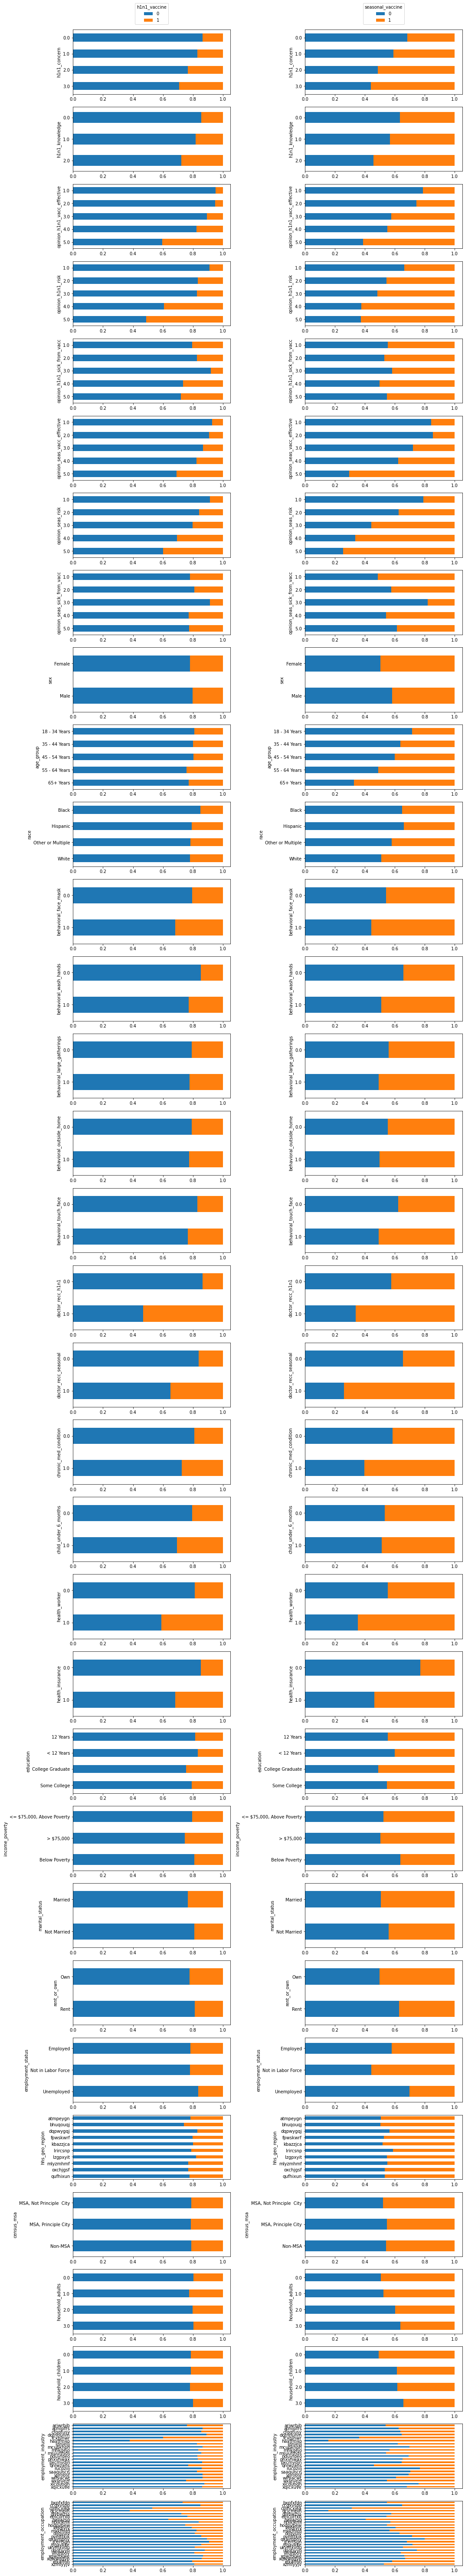

In [12]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
    'behavioral_face_mask', 
    'behavioral_wash_hands',
    'behavioral_large_gatherings', 
    'behavioral_outside_home',
    'behavioral_touch_face', 
    'doctor_recc_h1n1', 
    'doctor_recc_seasonal',
    'chronic_med_condition', 
    'child_under_6_months', 
    'health_worker',
    'health_insurance', 
    'education', 
    'income_poverty', 
    'marital_status',
    'rent_or_own', 
    'employment_status', 
    'hhs_geo_region', 
    'census_msa',
    'household_adults', 
    'household_children', 
    'employment_industry',
    'employment_occupation'
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(15,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

<AxesSubplot:>

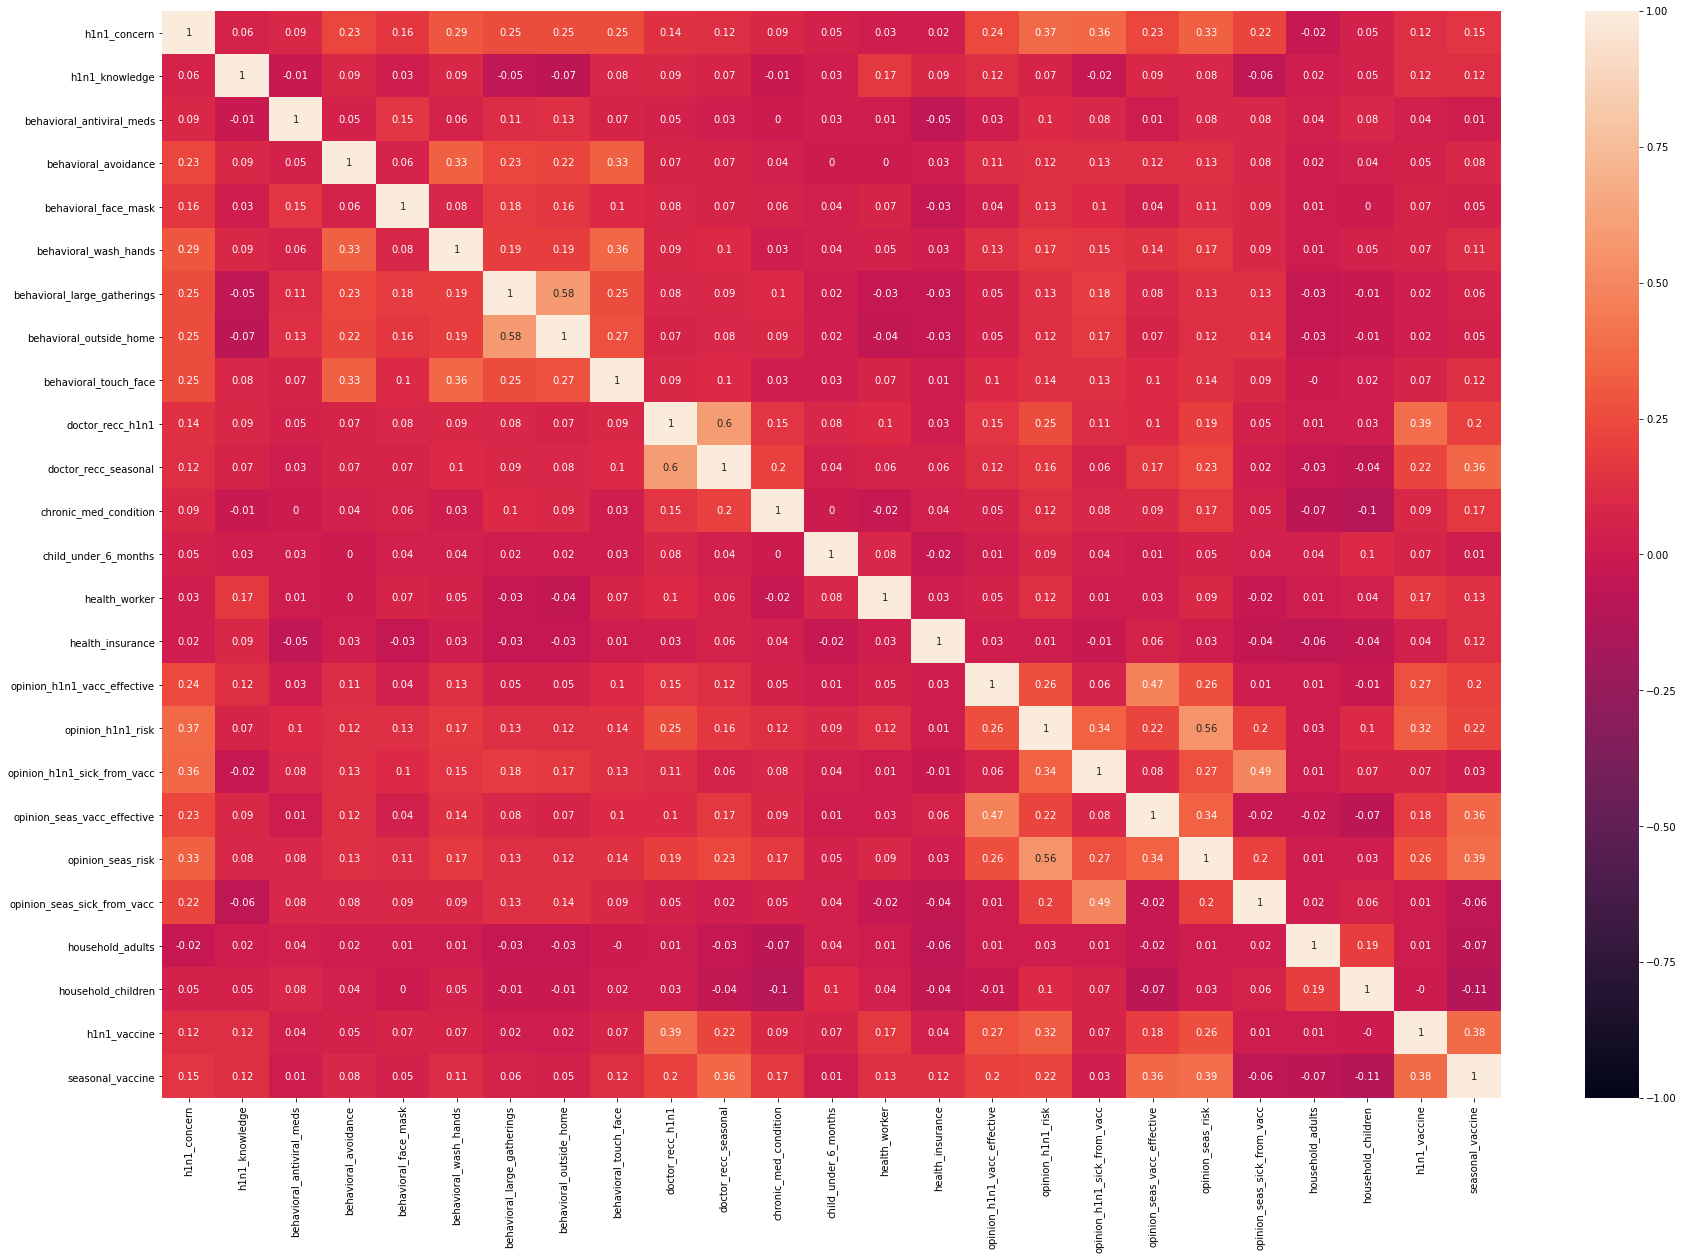

In [17]:
import seaborn as sns
plt.figure(figsize=(30,20))
sns.heatmap(df.corr().round(2),annot=True,vmin=-1,vmax=1)

In [18]:
(df=='unknown').sum()

h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [19]:
df_2 = df.drop(columns =['hhs_geo_region', 
                   'employment_industry', 
                   'employment_occupation', 
                   'household_adults',
                   'household_children',
                   'employment_status', 
                   'income_poverty',
                   'race', 
                   'opinion_seas_sick_from_vacc', 
                   'opinion_h1n1_sick_from_vacc',
                   'behavioral_outside_home',
                   'behavioral_large_gatherings',
                   'behavioral_avoidance',
                   'behavioral_antiviral_meds',
                    'census_msa',
#                     'seasonal_vaccine'
                    ])
                   
               

In [20]:
df_2

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,...,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,age_group,education,sex,marital_status,rent_or_own,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,55 - 64 Years,< 12 Years,Female,Not Married,Own,0,0
1,3.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,2.0,35 - 44 Years,12 Years,Male,Not Married,Rent,0,1
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,4.0,1.0,18 - 34 Years,College Graduate,Male,Not Married,Own,0,0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,5.0,4.0,65+ Years,12 Years,Female,Not Married,Rent,0,1
4,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,1.0,45 - 54 Years,Some College,Female,Married,Own,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,2.0,65+ Years,Some College,Female,Not Married,Own,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,2.0,5.0,1.0,18 - 34 Years,College Graduate,Male,Not Married,Rent,0,0
26704,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,5.0,4.0,55 - 64 Years,Some College,Female,Not Married,Own,0,1


In [23]:
df_2.dtypes


h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
age_group                       object
education                       object
sex                             object
marital_status                  object
rent_or_own                     object
h1n1_vaccine                     int64
seasonal_vaccine                 int64
dtype: object

In [24]:
df_2 = df.drop(columns =['hhs_geo_region', 
                   'employment_industry', 
                   'employment_occupation', 
                   'household_adults',
                   'household_children',
                   'household_children',
                   'employment_status', 
                   'income_poverty',
                   'race', 
                   'opinion_seas_sick_from_vacc', 
                   'opinion_h1n1_sick_from_vacc',
                   'behavioral_outside_home',
                   'behavioral_large_gatherings',
                   'behavioral_avoidance',
                   'behavioral_antiviral_meds',
                    'census_msa'])
                   
               

In [25]:
df_2

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,...,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,age_group,education,sex,marital_status,rent_or_own,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,55 - 64 Years,< 12 Years,Female,Not Married,Own,0,0
1,3.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,2.0,35 - 44 Years,12 Years,Male,Not Married,Rent,0,1
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,4.0,1.0,18 - 34 Years,College Graduate,Male,Not Married,Own,0,0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,5.0,4.0,65+ Years,12 Years,Female,Not Married,Rent,0,1
4,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,1.0,45 - 54 Years,Some College,Female,Married,Own,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,2.0,65+ Years,Some College,Female,Not Married,Own,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,2.0,5.0,1.0,18 - 34 Years,College Graduate,Male,Not Married,Rent,0,0
26704,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,5.0,4.0,55 - 64 Years,Some College,Female,Not Married,Own,0,1


In [26]:
(df_2=='unknown').sum()

h1n1_concern                      0
h1n1_knowledge                    0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_touch_face             0
doctor_recc_h1n1                  0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
health_insurance                  0
opinion_h1n1_vacc_effective       0
opinion_h1n1_risk                 0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
age_group                         0
education                      1407
sex                               0
marital_status                 1408
rent_or_own                    2042
h1n1_vaccine                      0
seasonal_vaccine                  0
dtype: int64

### Other option for categorical to numerical transformation: One hot encoding:


In [29]:
df_3=pd.get_dummies(df_2,drop_first=True)
df_3

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,...,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,education_unknown,sex_Male,rent_or_own_Rent,rent_or_own_unknown
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
1,3.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,1,1,0
26704,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0


In [30]:
df_2['rent_or_own'] = df_2['rent_or_own'].replace(to_replace = "Own", value = 0)
df_2['rent_or_own'] = df_2['rent_or_own'].replace(to_replace = "Rent", value = 1)
df_2['rent_or_own'] = df_2['rent_or_own'].replace(to_replace = "unknown", value = 2)

# encoder=LabelEncoder()
# df_2['rent_or_own']=encoder.fit_transform(df_2['rent_or_own'])

In [31]:
df_2['marital_status'] = df_2['marital_status'].replace(to_replace = "Not Married", value = 0)
df_2['marital_status'] = df_2['marital_status'].replace(to_replace = "Married", value = 1)
df_2['marital_status'] = df_2['marital_status'].replace(to_replace = "unknown", value = 2)



# encoder=LabelEncoder()
# df_2['marital_status']=encoder.fit_transform(df_2['marital_status'])

In [32]:
df_2['sex'] = df_2['sex'].replace(to_replace = "Female", value = 0)
df_2['sex'] = df_2['sex'].replace(to_replace = "Male", value = 1)

# encoder=LabelEncoder()
# df_2['sex']=encoder.fit_transform(df_2['sex'])

In [33]:
df_2['education'] = df_2['education'].replace(to_replace = "< 12 Years", value = 0)
df_2['education'] = df_2['education'].replace(to_replace = "12 Years", value = 1)
df_2['education'] = df_2['education'].replace(to_replace = "Some College", value = 2)
df_2['education'] = df_2['education'].replace(to_replace = "College Graduate", value = 3)
df_2['education'] = df_2['education'].replace(to_replace = "unknown", value = 4)

# encoder=LabelEncoder()
# df_2['education']=encoder.fit_transform(df_2['education'])

In [34]:
df_2['age_group'] = df_2['age_group'].replace(to_replace = "18 - 34 Years", value = 0)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "35 - 44 Years", value = 1)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "45 - 54 Years", value = 2)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "55 - 64 Years", value = 3)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "65+ Years", value = 4)

# encoder=LabelEncoder()
# df_2['age_group']=encoder.fit_transform(df_2['age_group'])

In [35]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   behavioral_face_mask         26707 non-null  float64
 3   behavioral_wash_hands        26707 non-null  float64
 4   behavioral_touch_face        26707 non-null  float64
 5   doctor_recc_h1n1             26707 non-null  float64
 6   doctor_recc_seasonal         26707 non-null  float64
 7   chronic_med_condition        26707 non-null  float64
 8   child_under_6_months         26707 non-null  float64
 9   health_worker                26707 non-null  float64
 10  health_insurance             26707 non-null  float64
 11  opinion_h1n1_vacc_effective  26707 non-null  float64
 12  opinion_h1n1_risk            26707 non-null  float64
 13  opinion_seas_vac

## Train Model

In [36]:
X = df_2.drop("h1n1_vaccine", axis=1)
y = df_2["h1n1_vaccine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Decision Tree

In [37]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train,y_train) 

DecisionTreeClassifier(random_state=42)

In [38]:
y_test_pred=tree_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.7777444960311517


In [41]:
y_score=tree_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.6750453887374814


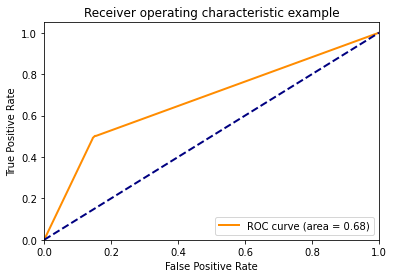

In [42]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [43]:
## Cross validation on the whole dataset, take advantage of the whole dataset
tree_model = DecisionTreeClassifier(random_state=42)
tree_log_loss = cross_val_score(tree_model, X, y, scoring="accuracy",cv=5)
tree_log_loss

array([0.76825159, 0.7723699 , 0.78393559, 0.78599513, 0.77214005])

In [44]:
print('Cross Validation accuracy',tree_log_loss.mean())

Cross Validation accuracy 0.7765384526684113


## Random Forest

In [47]:
## Train model
rf_model = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)

In [48]:
y_test_pred=rf_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8521791223603414


In [49]:
y_score=rf_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8700882255731125


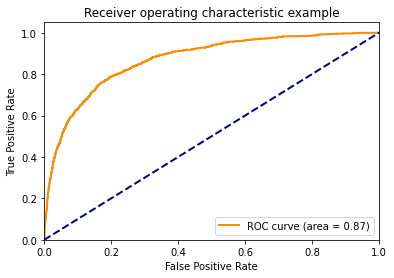

In [50]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## ADA Boost

In [52]:
## Train model
ab_model = AdaBoostClassifier()
ab_model.fit(X_train,y_train)

AdaBoostClassifier()

In [53]:
y_test_pred=ab_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.851879586640707


In [54]:
y_score=ab_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8674963832420466


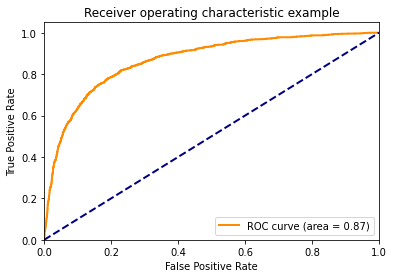

In [55]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Gradient Boost

In [57]:
## Train model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [58]:
y_test_pred=gb_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.855623783136139


In [59]:
y_score=gb_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8716182944556985


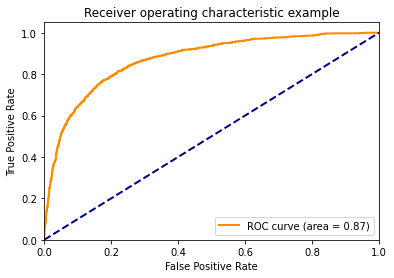

In [60]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Voting Classifier

In [62]:
clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=1)
clf3 = AdaBoostClassifier()

In [63]:
eclf1 = VotingClassifier(estimators=[('gb', clf1), ('rf', clf2), ('ab', clf3)], voting='hard')

In [64]:
eclf1.fit(X_train, y_train)

VotingClassifier(estimators=[('gb', GradientBoostingClassifier()),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=500,
                                                     random_state=1)),
                             ('ab', AdaBoostClassifier())])

In [65]:
y_test_pred=eclf1.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8560730867155908
